# Recap of Measuring Broadband Performance

What are some of the limitations of SpeedTests ?

What are the different types of speedtests, in particular answer whether they all use the same number of HTTP connections?

Approximately, what percentage of the total latency does the last mile latency account for ?


# Analyzing Different Metrics related to Chunk Detection

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('/data/transform_data.csv',sep='\t') #put your path to the processed csv right here

In [5]:
df.shape

(21342, 13)

### The same analysis we did last week can also be done using pandas as well.

## googlevideo traffic

googlevideo.com is the domain owned by google used to store videos for YouTube.

In [5]:
df[['dns_ip', 'dns_hostname']].drop_duplicates().query("dns_hostname.str.contains('googlevideo', na=False)", engine='python')


dns_ip                                       dns_hostname
4237  198.189.66.17  r6---sn-jxopj-n5oe.googlevideo.com,r6.sn-jxopj...
4238  198.189.66.17            r6.sn-jxopj-n5oe.googlevideo.com,<Root>
4239            NaN  r6---sn-jxopj-n5oe.googlevideo.com,r6.sn-jxopj...
4240            NaN            r6.sn-jxopj-n5oe.googlevideo.com,<Root>
5794  198.189.66.16  rr5---sn-jxopj-n5oe.googlevideo.com,rr5.sn-jxo...
5796            NaN  rr5---sn-jxopj-n5oe.googlevideo.com,rr5.sn-jxo...
5799  198.189.66.16           rr5.sn-jxopj-n5oe.googlevideo.com,<Root>
5801            NaN           rr5.sn-jxopj-n5oe.googlevideo.com,<Root>

In [7]:
df[['sIP','sPort', 'dIP', 'dPort', 'ip_proto', 'tls_hostname']].query("tls_hostname.str.contains('googlevideo', na=False)", engine='python')

sIP  sPort            dIP  dPort  ip_proto  \
1250   192.168.1.138  41402  198.189.66.17    443         6   
1258   192.168.1.138  41404  198.189.66.17    443         6   
1429   192.168.1.138  46564  198.189.66.16    443         6   
1441   192.168.1.138  46566  198.189.66.16    443         6   
5716   192.168.1.138  39718  198.189.66.17    443        17   
5873   192.168.1.138  50222  198.189.66.16    443        17   
19413  192.168.1.138  43937  198.189.66.16    443        17   

                              tls_hostname  
1250    r6---sn-jxopj-n5oe.googlevideo.com  
1258    r6---sn-jxopj-n5oe.googlevideo.com  
1429   rr5---sn-jxopj-n5oe.googlevideo.com  
1441   rr5---sn-jxopj-n5oe.googlevideo.com  
5716    r6---sn-jxopj-n5oe.googlevideo.com  
5873   rr5---sn-jxopj-n5oe.googlevideo.com  
19413  rr5---sn-jxopj-n5oe.googlevideo.com

### Other interesting queries

**Query 1**: Source IP addresses along with the number of packets and the bytes (in B) they transferred.

Try writing this query yourself. You can remember the pyspark syntax we used last week and try implementing it in pandas instead

**Query 2**: Destination IP addresses along with the number of packets and the bytes (in B) transferred to them.

Try writing this query yourself. You can remember the pyspark syntax we used last week and try implementing it in pandas instead

**Query 3**: `142.250.176.14` is the second most prominent IP address in both queries 1 and 2. Let's see what hostname this IP belongs to

In [10]:
df[['sIP', 'sPort', 'dIP', 'dPort', 'ip_proto', 'tls_hostname']][
    (df['dIP'] == '142.250.176.14') & (df['tls_hostname'].notna())
]


sIP  sPort             dIP  dPort  ip_proto     tls_hostname
1004   192.168.1.138  55104  142.250.176.14    443         6  www.youtube.com
3440   192.168.1.138  57212  142.250.176.14    443         6  www.youtube.com
3451   192.168.1.138  57214  142.250.176.14    443         6  www.youtube.com
3460   192.168.1.138  57216  142.250.176.14    443         6  www.youtube.com
4058   192.168.1.138  41465  142.250.176.14    443        17  www.youtube.com
21301  192.168.1.138  55745  142.250.176.14    443        17  www.youtube.com

**Query 4**: `99.84.192.24` ranks as the third most prominent source IP address which sends 2.1 Mb of data. Let's find out the hostname for this address

In [11]:
df[['sIP', 'sPort', 'dIP', 'dPort', 'ip_proto', 'tls_hostname']][
    (df['dIP'] == '99.84.192.24') & (df['tls_hostname'].notna())
]


sIP  sPort           dIP  dPort  ip_proto  \
185   192.168.1.138  38066  99.84.192.24    443         6   
228   192.168.1.138  38070  99.84.192.24    443         6   
253   192.168.1.138  38072  99.84.192.24    443         6   
289   192.168.1.138  38074  99.84.192.24    443         6   
331   192.168.1.138  38078  99.84.192.24    443         6   
479   192.168.1.138  38080  99.84.192.24    443         6   
887   192.168.1.138  38084  99.84.192.24    443         6   
910   192.168.1.138  38086  99.84.192.24    443         6   
932   192.168.1.138  38088  99.84.192.24    443         6   
956   192.168.1.138  38092  99.84.192.24    443         6   
978   192.168.1.138  38094  99.84.192.24    443         6   
1034  192.168.1.138  38098  99.84.192.24    443         6   
1059  192.168.1.138  38102  99.84.192.24    443         6   
1094  192.168.1.138  38104  99.84.192.24    443         6   
1148  192.168.1.138  38106  99.84.192.24    443         6   
1210  192.168.1.138  38110  99.84.192.24    443         6   
1328  192.168.1.138  38118  99.84.192.24    443         6   

                             tls_hostname  
185   tracking-protection.cdn.mozilla.net  
228   tracking-protection.cdn.mozilla.net  
253   tracking-protection.cdn.mozilla.net  
289   tracking-protection.cdn.mozilla.net  
331   tracking-protection.cdn.mozilla.net  
479   tracking-protection.cdn.mozilla.net  
887   tracking-protection.cdn.mozilla.net  
910   tracking-protection.cdn.mozilla.net  
932   tracking-protection.cdn.mozilla.net  
956   tracking-protection.cdn.mozilla.net  
978   tracking-protection.cdn.mozilla.net  
1034  tracking-protection.cdn.mozilla.net  
1059  tracking-protection.cdn.mozilla.net  
1094  tracking-protection.cdn.mozilla.net  
1148  tracking-protection.cdn.mozilla.net  
1210  tracking-protection.cdn.mozilla.net  
1328  tracking-protection.cdn.mozilla.net

## Isolating a flow for the video streaming session

A video streaming session consists of multiple flows. Let's isolate the biggest flow

In [54]:
multiple_flows= (
    df[(df['sIP'] == '198.189.66.16') & (df['dIP'] == '192.168.1.138')]
    .groupby(['sIP', 'sPort', 'dIP', 'dPort', 'ip_proto'])
    .agg(ip_len_sum=('ip_len', 'sum'), count=('ip_len', 'count'))
    .sort_values(by='ip_len_sum', ascending=False)
    .reset_index()
)

print(multiple_flows.to_string(index=False))

          sIP  sPort           dIP  dPort  ip_proto  ip_len_sum  count
198.189.66.16    443 192.168.1.138  50222        17    16753168  12148
198.189.66.16    443 192.168.1.138  43937        17     2500427   1811
198.189.66.16    443 192.168.1.138  46564         6      202465     70
198.189.66.16    443 192.168.1.138  46566         6       74920     36


## Constants and Functions

In [6]:
HOST_IP = "192.168.1.138"
YOUTUBE_IP = "198.189.66.16"
HOST_PORT = 50222
YOUTUBE_PORT = 443
TRANSPORT_PROTO = 17
GET_thresh = 300
DOWN_thresh = 300
VIDEO_thresh = 1000

Write the code to isolate the flow in pandas this time. More specifically, store all packets in this flow in a dataframe called flow_df. 

In [8]:
flow_df.head(3)

ts            sIP  sPort            dIP  dPort  ip_len  \
5873  1.651793e+09  192.168.1.138  50222  198.189.66.16    443    1385   
5874  1.651793e+09  198.189.66.16    443  192.168.1.138  50222    1385   
5875  1.651793e+09  198.189.66.16    443  192.168.1.138  50222    1385   

      ip_proto  tcp_flags  tcp_seq  tcp_ack  \
5873        17        NaN      NaN      NaN   
5874        17        NaN      NaN      NaN   
5875        17        NaN      NaN      NaN   

                             tls_hostname dns_hostname dns_ip  idx  
5873  rr5---sn-jxopj-n5oe.googlevideo.com          NaN    NaN    1  
5874                                  NaN          NaN    NaN    2  
5875                                  NaN          NaN    NaN    3

## Chunk Detection Algorithm

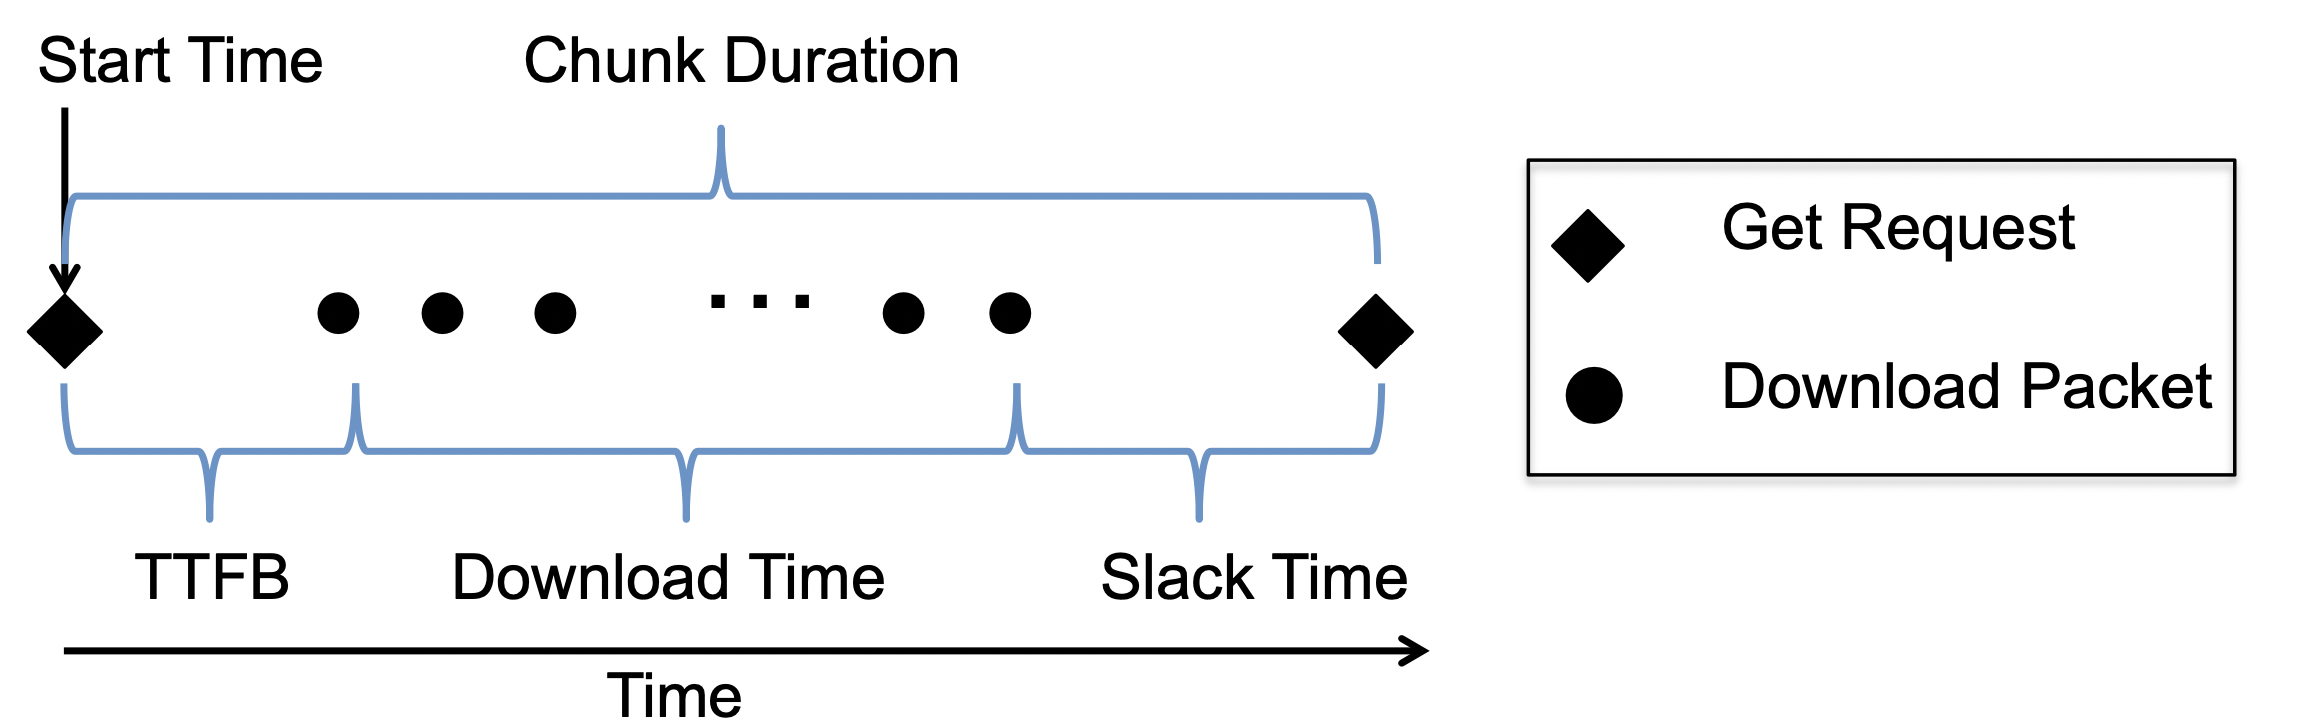

Credits: Requet: Real-Time QoE Detection for Encrypted YouTube Traffic (mmsys'19)

In [11]:
def get_request_indices():
    get_req_idx_df = flow_df[(flow_df['sIP'] == HOST_IP) & (flow_df['dIP'] == YOUTUBE_IP) & (flow_df['ip_len'] > GET_thresh) & (flow_df['ip_len'] > VIDEO_thresh)]
    return list(zip(get_req_idx_df['idx'], get_req_idx_df['ts']))

def chunk_detection():
    indices = get_request_indices()
    chunk_stats = []
    for i in range(len(indices)):
        curr_idx, curr_get_req_time = indices[i]
        next_idx, next_get_req_time = (None, None) if i == len(indices) - 1 else indices[i + 1]
        curr_chunk_df = flow_df[(flow_df['sIP'] == YOUTUBE_IP) & (flow_df['dIP'] == HOST_IP) & (flow_df['idx'] > curr_idx) & (flow_df['ip_len'] > DOWN_thresh)]
        if next_idx is not None:
            curr_chunk_df = curr_chunk_df[curr_chunk_df['idx'] < next_idx]

        chunk_size = curr_chunk_df['ip_len'].sum()
        if chunk_size < 80000:
            continue

        first_pkt_download_time = curr_chunk_df['ts'].min()
        last_pkt_download_time = curr_chunk_df['ts'].max()
        ttfb = first_pkt_download_time - curr_get_req_time
        chunk_stats.append({
            'ttfb': ttfb,
            'chunk_size': chunk_size,
            'last_get_req_time': curr_get_req_time,
            'next_get_req_time': next_get_req_time,
            'first_pkt_download_time': first_pkt_download_time,
            'last_pkt_download_time': last_pkt_download_time,
            'download_time': last_pkt_download_time - first_pkt_download_time,
        })
    return chunk_stats

chunk_data = chunk_detection()


In [12]:
chunk_data

[{'ttfb': 0.031063079833984375,
  'chunk_size': 598825,
  'last_get_req_time': 1651792552.057679,
  'next_get_req_time': 1651792552.342599,
  'first_pkt_download_time': 1651792552.088742,
  'last_pkt_download_time': 1651792552.271646,
  'download_time': 0.18290400505065918},
 {'ttfb': 0.006278038024902344,
  'chunk_size': 1123995,
  'last_get_req_time': 1651792552.342599,
  'next_get_req_time': 1651792561.149411,
  'first_pkt_download_time': 1651792552.348877,
  'last_pkt_download_time': 1651792554.217295,
  'download_time': 1.8684179782867432},
 {'ttfb': 0.006098031997680664,
  'chunk_size': 1823901,
  'last_get_req_time': 1651792561.149411,
  'next_get_req_time': 1651792564.172633,
  'first_pkt_download_time': 1651792561.155509,
  'last_pkt_download_time': 1651792561.441184,
  'download_time': 0.285675048828125},
 {'ttfb': 0.005983114242553711,
  'chunk_size': 357998,
  'last_get_req_time': 1651792564.172633,
  'next_get_req_time': 1651792577.095794,
  'first_pkt_download_time': 1651

### Practise Questions: 

Plot the CDF for the chunk size metric. You can look at the example and use that to formulate how you will plot the CDF. 

Compute the chunk duration metric for all chunks in the video stream and plot the CDF.

Compute the packet count per chunk for all chunks in the video stream and plot the CDF and line-plot.

Bonus: Calculate the maximum and minimum inter-arrival times between packets in the same chunk and plot the CDF and line-plot. 


### Plotting

In [16]:
def change_plot_params(ax, xlabel, ylabel, Xmin, Xmax, is_x_log=False, is_y_log=False):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if is_x_log:
        ax.set_xscale('log')
    if is_y_log:
        ax.set_yscale('log')
    if Xmin is not None:
        ax.set_xlim(xmin=Xmin)
    if Xmax is not None:
        ax.set_xlim(xmax=Xmax)
    ax.grid(True)
    return

def get_color_and_linestyle_kwargs(i):
    color_n = ['r', 'b', 'k', 'g', 'm', 'c', 'y']
    linestyles = ['-', '--', ':', '-.']
    return {'color': color_n[i % len(color_n)], 'linestyle': linestyles[i % len(linestyles)]}

def plotCDF(ax, data, labels, xlabel, ylabel, Xmax=None, Xmin=None, log_scale=False,
            set_legend=True, color_n_linestyle_dicts=None):
    raw = {}
    markers = ['o', '*', '^', '1', '4', 's', 'd', '3', 'd', 'o', '*', '^']

    for key in sorted(labels):
        raw[key] = list(data[key])
        if len(raw[key]) == 0:
            continue

        elms, cts = np.unique(raw[key], return_counts=True)
        cdf = np.cumsum(cts)
        cdf = cdf / cdf[-1]
        kwargs_dict = (get_color_and_linestyle_kwargs(key) if color_n_linestyle_dicts is None
                       else color_n_linestyle_dicts[key])
        ax.step(list(elms[:1]) + list(elms), [0] + list(cdf), where='post',
                label=labels[key], **kwargs_dict)

    # pl.legend((p),legnd,'lower right')
    if len(labels) > 1 and set_legend:
        set_legend_to_right(ax)

    change_plot_params(ax, xlabel, ylabel, Xmin, Xmax, is_x_log=log_scale)
    ax.set_ylim(ymax=1.0)
    ax.set_ylim(ymin=0.0)

## Example:

In [108]:
ttfb_data = [x['ttfb'] * 1000 for x in chunk_data]

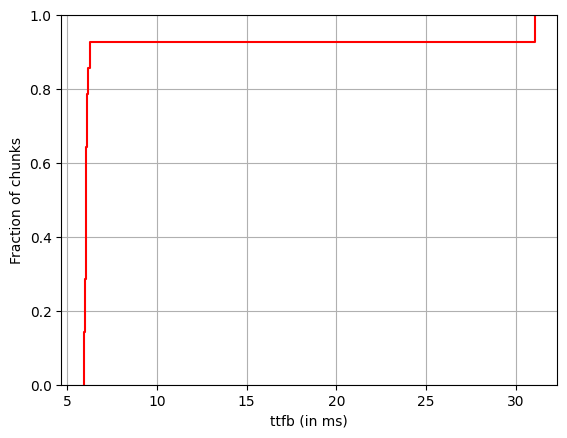

In [143]:
plotCDF(plt.gca(), {0: ttfb_data}, {0: ''}, 'ttfb (in ms)', 'Fraction of chunks')
plt.show()

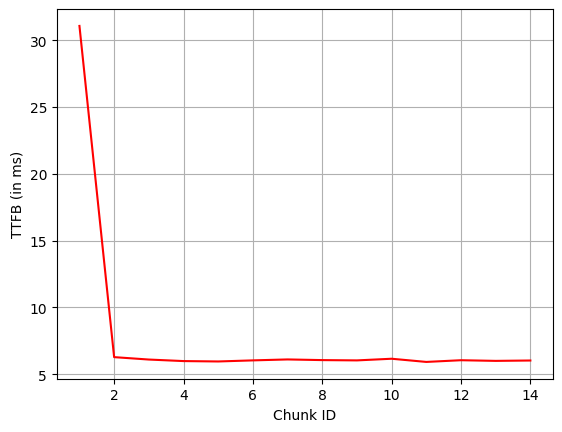

In [144]:
def line_plot():
    chunk_ids = range(1, 1 + len(chunk_data))
    plt.plot(chunk_ids, ttfb_data, **get_color_and_linestyle_kwargs(0))
    change_plot_params(plt.gca(), 'Chunk ID', 'TTFB (in ms)', None, None, is_x_log=False, is_y_log=False)
    return

line_plot()
plt.show()